# Image color palette generator

code source https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74

import the requires library. will be using OpenCv and not PIL to read the image file

In [8]:
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from sklearn.cluster import KMeans

In [16]:
image = cv2.imread('color_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [10]:
# Converting the colors to hex colors thus returning the hex value instead of the color name
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [11]:
# Function tp prep the image
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [14]:
def color_analysis(img):
    # Using k-means to cluster the top 10 colors
    clf = KMeans(n_clusters = 10)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    # Creatng a dictionary to store the colors and their volume
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    # assigning hex values to colors
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    
    print(hex_colors)

['#2f6b27', '#1b4e92', '#c71767', '#3771b6', '#833f1f', '#ca813e', '#032659', '#8cda78', '#55092c', '#f0dc79']


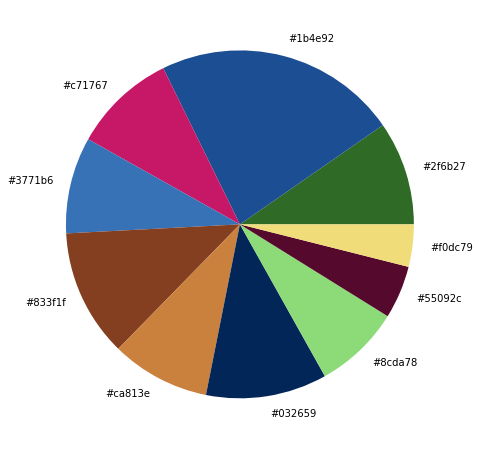

In [19]:
modified_image = prep_image(image)
color_analysis(modified_image)
